## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [2]:
df = pd.read_csv('ufo_sightings.csv', index_col='#')

df.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Described_Duration,Description,Date_Documented,Latitude,Longitude
#,,,,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,Lackland Afb,TX,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,Chester (Uk/England),NaN,GB,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [3]:
cleandf = df.dropna()

cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            53562 non-null  object 
 1   City                 53562 non-null  object 
 2   State/Province       53562 non-null  object 
 3   Country              53562 non-null  object 
 4   UFO_Shape            53562 non-null  object 
 5   Length_of_Encounter  53562 non-null  float64
 6   Described_Duration   53562 non-null  object 
 7   Description          53562 non-null  object 
 8   Date_Documented      53562 non-null  object 
 9   Latitude             53562 non-null  float64
 10  Longitude            53562 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.9+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [4]:
filterdf = cleandf.drop(['Described_Duration', 'Description', 'Date_Documented'], axis=1)

filterdf.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [5]:
filterdf['Date_Time'] = pd.to_datetime(filterdf['Date_Time'])

filterdf.info()
filterdf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date_Time            53562 non-null  datetime64[ns]
 1   City                 53562 non-null  object        
 2   State/Province       53562 non-null  object        
 3   Country              53562 non-null  object        
 4   UFO_Shape            53562 non-null  object        
 5   Length_of_Encounter  53562 non-null  float64       
 6   Latitude             53562 non-null  float64       
 7   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,1949-10-10 20:30:00,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,1956-10-10 21:00:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,1965-10-10 23:45:00,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


In [6]:
UFO_Cities = filterdf['City'].value_counts()

UFO_Cities

Seattle              383
Phoenix              379
Las Vegas            294
Los Angeles          290
Portland             277
                    ... 
Smoaks                 1
Whitehouse             1
Hesperia (Sse Of)      1
Gilliam                1
Barron                 1
Name: City, Length: 10620, dtype: int64

Text(0, 0.5, 'Number of Encounters')

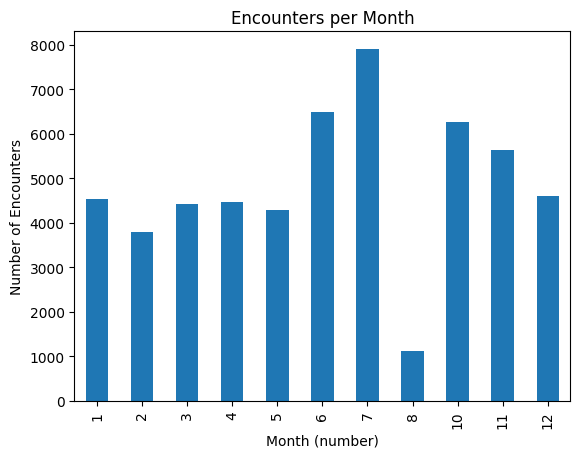

In [8]:
filterdf['Month'] = pd.DatetimeIndex(filterdf['Date_Time']).month

filterdf['Month'].value_counts().sort_index().plot.bar()
plt.title('Encounters per Month')
plt.xlabel('Month (number)')
plt.ylabel('Number of Encounters')

## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Number of Encounters')

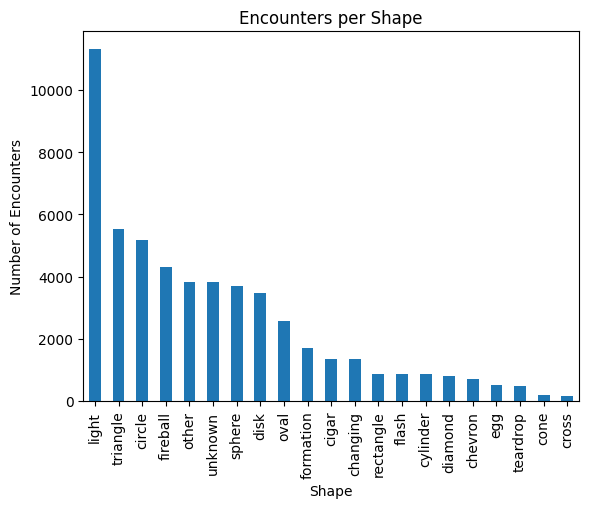

In [9]:
UFO_Shapes = filterdf['UFO_Shape'].value_counts()

UFO_Shapes.plot.bar();
plt.title('Encounters per Shape')
plt.xlabel('Shape')
plt.ylabel('Number of Encounters')

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Number of Encounters')

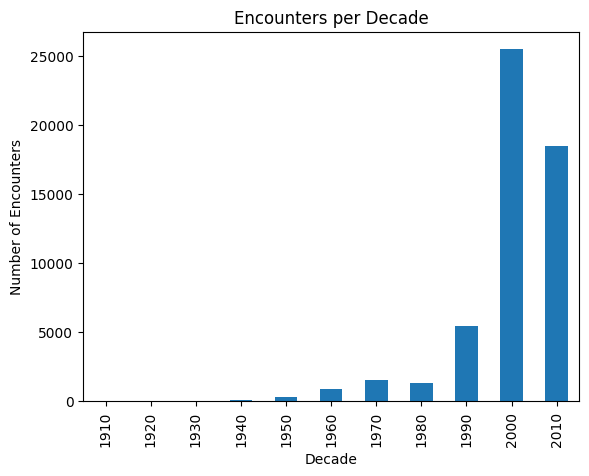

In [15]:
filterdf['decade'] = ((pd.DatetimeIndex(filterdf['Date_Time']).year) // 10)*10

## filterdf.head()

UFO_Encounter_dec = filterdf['decade'].value_counts().sort_index()

UFO_Encounter_dec.plot.bar()
plt.title('Encounters per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Encounters')

### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Number of Encounters')

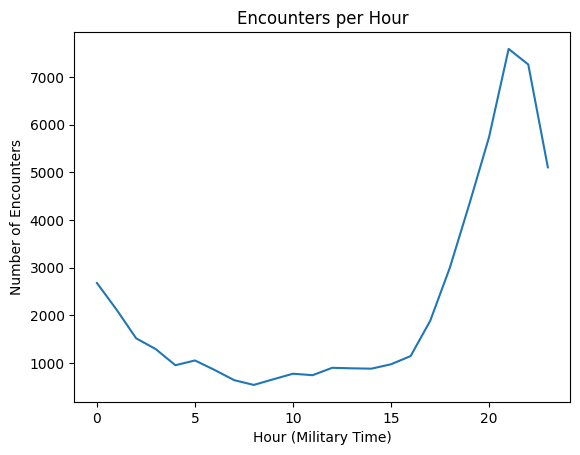

In [10]:
filterdf['Hour'] = pd.DatetimeIndex(filterdf['Date_Time']).hour

filterdf['Hour'].value_counts().sort_index().plot.line()

## filterdf.head()

## UFO_Sight_hour = filterdf['Hour'].value_counts()

## UFO_Sight_hour
plt.title('Encounters per Hour')
plt.xlabel('Hour (Military Time)')
plt.ylabel('Number of Encounters')

### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Light

2. Which shape is least frequently reported?
    * cross, though only slightly less than cone

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * the highest occurances were during the late hours of the night between 8 p.m. to midnight

4. Are there other factors that may account for this pattern in the data?
    * since the largest sighting shape was 'light' it makes sense for the most sightings to be when it becomes dark. preformin an extra search for the count of occurnces per city it shows the most common occurances happened in light and population heavy locations. seattle shows the highest number which could be concluded was from lights refracting from the clouds in the city. Seattle has a high rate of cloudy days per year. as flashlights became stronger they could shine in the clouds and refract a possible shape that could be missunderstoof for ufo's.

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * with the largest occurance occuring in 2000 and 2010 this would make sense. the creation of the internet happened in 1983, however the major initial growth did not occur until mid to late ninties. as the internet becomes more accessable to everyone occurances will increase. more access to media makes record keeping easier.

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * for the best chance to 'find a UFO' i would travel to a population dense area and look around over the course of 8pm to midnight. the highest month of occurance is during July, and least is August.


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Number of Encounters')

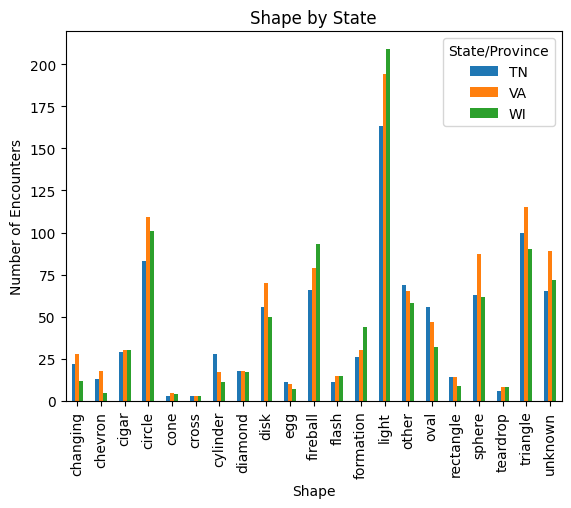

In [20]:
Statefdf = filterdf[(filterdf['State/Province'] == 'WI')|(filterdf['State/Province'] == 'VA')|(filterdf['State/Province'] == 'TN')]

Statefdf.groupby(['UFO_Shape', 'State/Province']).size().unstack().plot.bar()
plt.title('Shape by State')
plt.xlabel('Shape')
plt.ylabel('Number of Encounters');
